# Zillow Prize: Zillow’s Home Value Prediction (Zestimate)

Zillow’s Zestimate home valuation has shaken up the U.S. real estate industry since first released 11 years ago.

A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring homeowners have a trusted way to monitor this asset is incredibly important. The Zestimate was created to give consumers as much information as possible about homes and the housing market, marking the first time consumers had access to this type of home value information at no cost.

“Zestimates” are estimated home values based on 7.5 million statistical and machine learning models that analyze hundreds of data points on each property. And, by continually improving the median margin of error (from 14% at the onset to 5% today), Zillow has since become established as one of the largest, most trusted marketplaces for real estate information in the U.S. and a leading example of impactful machine learning.

#### Zillow is asking you to predict the log-error between their Zestimate and the actual sale price, given all the features of a home.

# overview

### Downloading the data
- Loading it into a dataframe
- Describing dataset


### Proccessing and Feature Engineering
- Duplicate values
- Merging of property and training dataset
- Missing Valuse above 35% droped
- Date column


### Exploratory Data Analysis and Visualisation
- Date
- Parcel Location
- Target Variable
- correlation Heatmap

### Identifying Input and Target Columns

### Categorical and Numeric Columns
- Encoded categorical columns
- Imputing missing numerical columns
- Scale numeric values

### Splitting the data for training
- Training data(X_train)
- Validation data(X_val)

## Training and Tuning Different Model
- Random Forest Regression
- XGBRegressor
- Gradient Boosting Regression

### Training Final Model
- Gradient Boost Regression

### Saving The Model
- Using joblib

### Test Ptrdiction
- conclution

### Conclusion
- Summary
- Downside
- Limitations

Import libraries to be used

In [1]:
import os
import opendatasets as od
import pandas as pd
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

Downloading the dataset from kaggle

In [5]:
od.download('https://www.kaggle.com/c/zillow-prize-1')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kcpele
Your Kaggle Key: ········


100%|████████████████████████████████| 340M/340M [02:10<00:00, 2.73MB/s]



Extracting archive .\zillow-prize-1/zillow-prize-1.zip to .\zillow-prize-1


In [2]:
os.listdir('.\zillow-prize-1')

['properties_2016.csv',
 'properties_2017.csv',
 'sample_submission.csv',
 'train_2016_v2.csv',
 'train_2017.csv',
 'zillow_data_dictionary.xlsx']

In [4]:
prop_raw = pd.read_csv('.\zillow-prize-1/properties_2016.csv')
train_raw = pd.read_csv('.\zillow-prize-1/train_2016_v2.csv')

C:\Users\userpc\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (22,32,34,49,55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
prop_raw.head(6)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN
5,10898347,NaN,NaN,NaN,0.0,0.0,4.0,7.0,NaN,NaN,NaN,2400.0,NaN,NaN,2400.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34171873.0,-118380906.0,2500.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAC4,6.037125e+07,12447.0,3101.0,46795.0,96446.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1943.0,1.0,NaN,176383.0,283315.0,2015.0,106932.0,3661.28,NaN,NaN,NaN


In [6]:
train_raw.head(6)

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02
5,11509835,-0.2705,2016-01-02


### Details

In [7]:
def get_unique(name,data_series):
    print("{} has total {} records and {} are unique.".format(name,len(data_series),len(data_series.unique())))

In [8]:
get_unique('train_raw_df', train_raw['parcelid'])

train_raw_df has total 90275 records and 90150 are unique.


In [9]:
get_unique('property_raw_df', prop_raw['parcelid'])

property_raw_df has total 2985217 records and 2985217 are unique.


### Preprocessing and Feature Engineering
Let's take a look at the available columns, and figure out if we can create new columns or apply any useful transformations.

### Duplicate Values
Train data has some duplicate values Let's analyse those duplicate values to get better understanding.

In [10]:
duplicate_df = train_raw[train_raw.duplicated(["parcelid"],keep=False)]
print("All Duplicate Rows based on all columns are :")
pd.DataFrame(duplicate_df.head(10))

All Duplicate Rows based on all columns are :


,parcelid,logerror,transactiondate
496,13850164,-0.1567,2016-01-05
497,13850164,-0.0460,2016-06-29
781,14677191,-0.3682,2016-01-06
782,14677191,-0.0845,2016-09-12
813,11005771,-0.0131,2016-01-06
814,11005771,0.0545,2016-06-17
967,11183209,-0.0481,2016-01-07
968,11183209,-0.0070,2016-09-14
1164,11554091,-0.1696,2016-01-07
1165,11554091,-0.0954,2016-07-05


In [11]:
duplicate_df["parcelid"].value_counts()

11842707    3
13850164    2
11105038    2
11602482    2
12613442    2
           ..
11633771    2
17151530    2
10911172    2
14678446    2
14367791    2
Name: parcelid, Length: 124, dtype: int64

In [12]:
duplicate_df.loc[duplicate_df["parcelid"]==11842707]

,parcelid,logerror,transactiondate
55794,11842707,-0.0284,2016-07-14
55795,11842707,0.0573,2016-08-22
55796,11842707,0.2078,2016-09-29


Here, we can observe that some houses were sold earlier in the year 2016 and after some month they were sold again in the same year. so we will consider the last selling price of this type of house.

In [13]:
unique_train_df = train_raw.sort_values("transactiondate").drop_duplicates("parcelid",keep = "last")

In [14]:
get_unique("unique_train_df",unique_train_df["parcelid"])

unique_train_df has total 90150 records and 90150 are unique.


### Merging two dataset for extensive EDA

In [15]:
merged_df = pd.merge(prop_raw, unique_train_df, on='parcelid', how='left')

In [16]:
get_unique('merged_df', merged_df['parcelid'])

merged_df has total 2985217 records and 2985217 are unique.


In [17]:
merged_df['logerror'].value_counts().sum()

90150

### Missing Values
Dealing with missing Values

First of all lets look at the target columns to see if there are missing values

In [20]:
merged_df['logerror'].isna().sum()

2895067

- It seems there are missing values on the target column which will not be good for training our model
- Removing all the rows with null values 

In [21]:
train_df = merged_df[merged_df['logerror'].notna()]

In [22]:
len(train_df)

90150

From the description of the dataset on kaggle, it was shown that there are so many column that have a lot of missing values

Checking for columns with missing values greater than 35%

In [30]:
def drop_columns(data):
    missing_value_df = pd.DataFrame((data.isnull().sum()/len(data))*100,columns=["missing_value"])
    drop_columns_list = missing_value_df.loc[missing_value_df["missing_value"]>35].index.to_list()
    return drop_columns_list

In [31]:
drop_col = drop_columns(train_df)

These are the columns to be droped that have more than 30% missing values

In [32]:
drop_col

['buildingqualitytypeid',
 'heatingorsystemtypeid',
 'propertyzoningdesc',
 'unitcnt']

In [33]:
train_df.drop(columns=drop_col,inplace = True)

In [34]:
(train_df.isnull().sum()/len(train_df))*100

parcelid                         0.000000
bathroomcnt                      0.000000
bedroomcnt                       0.000000
calculatedbathnbr                1.304493
calculatedfinishedsquarefeet     0.729895
finishedsquarefeet12             5.174709
fips                             0.000000
fullbathcnt                      1.304493
latitude                         0.000000
longitude                        0.000000
lotsizesquarefeet               11.243483
propertycountylandusecode        0.001109
propertylandusetypeid            0.000000
rawcensustractandblock           0.000000
regionidcity                     1.997781
regionidcounty                   0.000000
regionidzip                      0.038824
roomcnt                          0.000000
yearbuilt                        0.835275
structuretaxvaluedollarcnt       0.419301
taxvaluedollarcnt                0.001109
assessmentyear                   0.000000
landtaxvaluedollarcnt            0.001109
taxamount                        0

we can now see from the data above that there are only columns with nan values below 35%

In [35]:
train_df.dtypes

parcelid                          int64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fips                            float64
fullbathcnt                     float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertycountylandusecode        object
propertylandusetypeid           float64
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                  float64
regionidzip                     float64
roomcnt                         float64
yearbuilt                       float64
structuretaxvaluedollarcnt      float64
taxvaluedollarcnt               float64
assessmentyear                  float64
landtaxvaluedollarcnt           float64
taxamount                       float64
censustractandblock             float64


### Date Columnns

The data set only contains 2016 as the year. i will create a new column for month and day living out the year

In [37]:
def split_date_df(df):
    df['Date'] = pd.to_datetime(df['transactiondate'])
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [38]:
split_date_df(train_df)

C:\Users\userpc\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\userpc\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\userpc\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [39]:
train_df

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,Date,Month,Day,WeekOfYear
362,17073783,2.5,3.0,2.5,1264.0,1264.0,6111.0,2.0,34303597.0,-119287236.0,1735.0,1128,265.0,6.111002e+07,34543.0,2061.0,97081.0,5.0,1986.0,115087.0,191811.0,2015.0,76724.0,2015.06,6.111002e+13,0.0953,2016-01-27,2016-01-27,1,27,4
428,17088994,1.0,2.0,1.0,777.0,777.0,6111.0,1.0,34272866.0,-119198911.0,NaN,1129,266.0,6.111002e+07,34543.0,2061.0,97083.0,4.0,1990.0,143809.0,239679.0,2015.0,95870.0,2581.30,6.111002e+13,0.0198,2016-03-30,2016-03-30,3,30,13
470,17100444,2.0,3.0,2.0,1101.0,1101.0,6111.0,2.0,34340801.0,-119079610.0,6569.0,1111,261.0,6.111001e+07,26965.0,2061.0,97113.0,5.0,1956.0,33619.0,47853.0,2015.0,14234.0,591.64,6.111001e+13,0.0060,2016-05-27,2016-05-27,5,27,21
480,17102429,1.5,2.0,1.5,1554.0,1554.0,6111.0,1.0,34354313.0,-119076405.0,7400.0,1110,261.0,6.111001e+07,26965.0,2061.0,97113.0,5.0,1965.0,45609.0,62914.0,2015.0,17305.0,682.78,6.111001e+13,-0.0566,2016-06-07,2016-06-07,6,7,23
507,17109604,2.5,4.0,2.5,2415.0,2415.0,6111.0,2.0,34266578.0,-119165392.0,6326.0,1111,261.0,6.111001e+07,34543.0,2061.0,97084.0,8.0,1984.0,277000.0,554000.0,2015.0,277000.0,5886.92,6.111001e+13,0.0573,2016-08-08,2016-08-08,8,8,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2973529,11876798,3.0,4.0,3.0,2068.0,2068.0,6037.0,3.0,34097523.0,-118164828.0,4981.0,0100,261.0,6.037201e+07,12447.0,3101.0,96013.0,0.0,2008.0,388582.0,596082.0,2015.0,207500.0,7335.81,6.037201e+13,0.0276,2016-04-15,2016-04-15,4,15,15
2973663,12808516,2.0,3.0,2.0,1352.0,1352.0,6037.0,2.0,34045228.0,-117971653.0,6170.0,0100,261.0,6.037407e+07,39306.0,3101.0,96490.0,0.0,1956.0,86209.0,178408.0,2015.0,92199.0,2441.74,6.037407e+13,-0.1188,2016-06-07,2016-06-07,6,7,23
2973689,12010248,2.0,2.0,2.0,860.0,860.0,6037.0,2.0,34100819.0,-118311704.0,NaN,010C,266.0,6.037191e+07,12447.0,3101.0,96009.0,0.0,2011.0,129000.0,420000.0,2015.0,291000.0,5070.41,6.037191e+13,0.0843,2016-06-30,2016-06-30,6,30,26
2973726,14310905,2.5,3.0,2.5,2268.0,2268.0,6059.0,2.0,33660088.0,-117804958.0,3479.0,1,261.0,6.059063e+07,52650.0,1286.0,96947.0,0.0,2012.0,389474.0,1215816.0,2015.0,826342.0,12508.30,NaN,-0.0050,2016-03-31,2016-03-31,3,31,13


Since transactiondata and Data column are now the same and will not be needed, i will drop them

In [40]:
train_df.drop(columns=['transactiondate', 'Date'],inplace = True)

C:\Users\userpc\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
train_df

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,Month,Day,WeekOfYear
362,17073783,2.5,3.0,2.5,1264.0,1264.0,6111.0,2.0,34303597.0,-119287236.0,1735.0,1128,265.0,6.111002e+07,34543.0,2061.0,97081.0,5.0,1986.0,115087.0,191811.0,2015.0,76724.0,2015.06,6.111002e+13,0.0953,1,27,4
428,17088994,1.0,2.0,1.0,777.0,777.0,6111.0,1.0,34272866.0,-119198911.0,NaN,1129,266.0,6.111002e+07,34543.0,2061.0,97083.0,4.0,1990.0,143809.0,239679.0,2015.0,95870.0,2581.30,6.111002e+13,0.0198,3,30,13
470,17100444,2.0,3.0,2.0,1101.0,1101.0,6111.0,2.0,34340801.0,-119079610.0,6569.0,1111,261.0,6.111001e+07,26965.0,2061.0,97113.0,5.0,1956.0,33619.0,47853.0,2015.0,14234.0,591.64,6.111001e+13,0.0060,5,27,21
480,17102429,1.5,2.0,1.5,1554.0,1554.0,6111.0,1.0,34354313.0,-119076405.0,7400.0,1110,261.0,6.111001e+07,26965.0,2061.0,97113.0,5.0,1965.0,45609.0,62914.0,2015.0,17305.0,682.78,6.111001e+13,-0.0566,6,7,23
507,17109604,2.5,4.0,2.5,2415.0,2415.0,6111.0,2.0,34266578.0,-119165392.0,6326.0,1111,261.0,6.111001e+07,34543.0,2061.0,97084.0,8.0,1984.0,277000.0,554000.0,2015.0,277000.0,5886.92,6.111001e+13,0.0573,8,8,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2973529,11876798,3.0,4.0,3.0,2068.0,2068.0,6037.0,3.0,34097523.0,-118164828.0,4981.0,0100,261.0,6.037201e+07,12447.0,3101.0,96013.0,0.0,2008.0,388582.0,596082.0,2015.0,207500.0,7335.81,6.037201e+13,0.0276,4,15,15
2973663,12808516,2.0,3.0,2.0,1352.0,1352.0,6037.0,2.0,34045228.0,-117971653.0,6170.0,0100,261.0,6.037407e+07,39306.0,3101.0,96490.0,0.0,1956.0,86209.0,178408.0,2015.0,92199.0,2441.74,6.037407e+13,-0.1188,6,7,23
2973689,12010248,2.0,2.0,2.0,860.0,860.0,6037.0,2.0,34100819.0,-118311704.0,NaN,010C,266.0,6.037191e+07,12447.0,3101.0,96009.0,0.0,2011.0,129000.0,420000.0,2015.0,291000.0,5070.41,6.037191e+13,0.0843,6,30,26
2973726,14310905,2.5,3.0,2.5,2268.0,2268.0,6059.0,2.0,33660088.0,-117804958.0,3479.0,1,261.0,6.059063e+07,52650.0,1286.0,96947.0,0.0,2012.0,389474.0,1215816.0,2015.0,826342.0,12508.30,NaN,-0.0050,3,31,13


### Exploratory Data Analysis and Visualization

I will be using some python Libraries for the visualization to see the relation between other columns and the customers

In [90]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [91]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [241]:
train_df

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,Month,Day,WeekOfYear
362,17073783,2.5,3.0,2.5,1264.0,1264.0,6111.0,2.0,34303597.0,-119287236.0,1735.0,1128,265.0,6.111002e+07,34543.0,2061.0,97081.0,5.0,1986.0,115087.0,191811.0,2015.0,76724.0,2015.06,6.111002e+13,0.0953,1,27,4
428,17088994,1.0,2.0,1.0,777.0,777.0,6111.0,1.0,34272866.0,-119198911.0,NaN,1129,266.0,6.111002e+07,34543.0,2061.0,97083.0,4.0,1990.0,143809.0,239679.0,2015.0,95870.0,2581.30,6.111002e+13,0.0198,3,30,13
470,17100444,2.0,3.0,2.0,1101.0,1101.0,6111.0,2.0,34340801.0,-119079610.0,6569.0,1111,261.0,6.111001e+07,26965.0,2061.0,97113.0,5.0,1956.0,33619.0,47853.0,2015.0,14234.0,591.64,6.111001e+13,0.0060,5,27,21
480,17102429,1.5,2.0,1.5,1554.0,1554.0,6111.0,1.0,34354313.0,-119076405.0,7400.0,1110,261.0,6.111001e+07,26965.0,2061.0,97113.0,5.0,1965.0,45609.0,62914.0,2015.0,17305.0,682.78,6.111001e+13,-0.0566,6,7,23
507,17109604,2.5,4.0,2.5,2415.0,2415.0,6111.0,2.0,34266578.0,-119165392.0,6326.0,1111,261.0,6.111001e+07,34543.0,2061.0,97084.0,8.0,1984.0,277000.0,554000.0,2015.0,277000.0,5886.92,6.111001e+13,0.0573,8,8,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2973529,11876798,3.0,4.0,3.0,2068.0,2068.0,6037.0,3.0,34097523.0,-118164828.0,4981.0,0100,261.0,6.037201e+07,12447.0,3101.0,96013.0,0.0,2008.0,388582.0,596082.0,2015.0,207500.0,7335.81,6.037201e+13,0.0276,4,15,15
2973663,12808516,2.0,3.0,2.0,1352.0,1352.0,6037.0,2.0,34045228.0,-117971653.0,6170.0,0100,261.0,6.037407e+07,39306.0,3101.0,96490.0,0.0,1956.0,86209.0,178408.0,2015.0,92199.0,2441.74,6.037407e+13,-0.1188,6,7,23
2973689,12010248,2.0,2.0,2.0,860.0,860.0,6037.0,2.0,34100819.0,-118311704.0,NaN,010C,266.0,6.037191e+07,12447.0,3101.0,96009.0,0.0,2011.0,129000.0,420000.0,2015.0,291000.0,5070.41,6.037191e+13,0.0843,6,30,26
2973726,14310905,2.5,3.0,2.5,2268.0,2268.0,6059.0,2.0,33660088.0,-117804958.0,3479.0,1,261.0,6.059063e+07,52650.0,1286.0,96947.0,0.0,2012.0,389474.0,1215816.0,2015.0,826342.0,12508.30,NaN,-0.0050,3,31,13


##### Dates

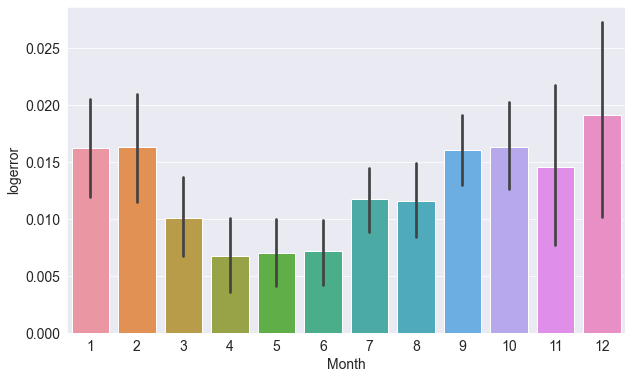

In [244]:
sns.barplot(x='Month', y='logerror', data=train_df);

December is has the highest number of logerror

##### Parcel Locations
Let's explore location/region related variables! Variables written below are used to plot regions.

1 longitude & latitude
2 regions: regionidcounty, regionidcity, regionidzip

Overall region looks like below! According to Kaggle description, data from Los Angeles, Orange, Ventura are included

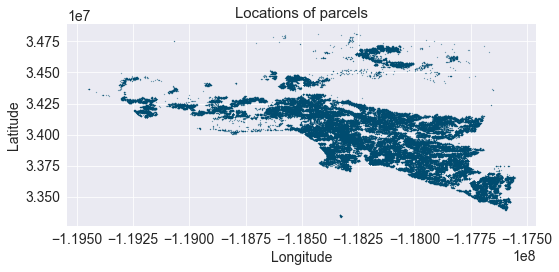

In [249]:
# overall region plot
plt.figure(figsize = (8,4))
ax = plt.subplot(1,1,1)
plt.plot(train_df['longitude'], train_df['latitude'], 'o', markersize = 0.2, color = '#004c70');
plt.xlabel('Longitude'); plt.ylabel('Latitude'); plt.title('Locations of parcels', fontsize = 15)

for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)

plt.tight_layout()

#### Target variable: Logerror
Target variable, Logerror ranges from -5 to 5, but mostly distributed around 0. Plus, distribution plots of year 2016 and 2017 are almost same!

C:\Users\userpc\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


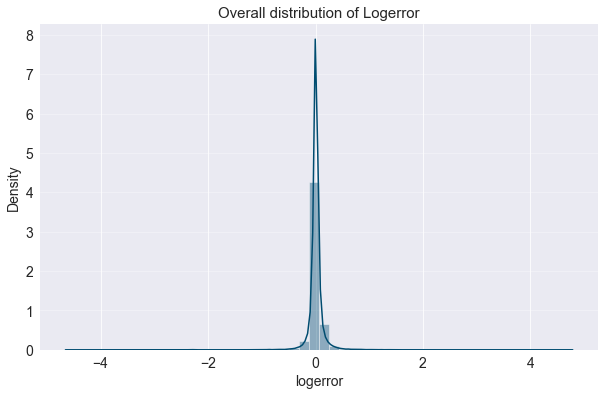

In [248]:
ax = plt.subplot(1,1,1)
sns.distplot(train_df['logerror'], color = '#004c70')
plt.title('Overall distribution of Logerror', fontsize = 15)

for s in ['top','left','right']:
    ax.spines[s].set_visible(False)
ax.grid(axis='y', linestyle='-', alpha=0.4)
plt.show();

##### Correlation Heatmap
Graph below shows correlation heatmap based on correlation coefficients with logerror. Overall coeffs are really small, maximum is 0.04. According to this heatmap, important variables are finishedsquarefeet12, calcuatedfinishedsquarefeet, calculatedbathnbr, bedroomcnt, fullbathcnt, bathroomcnt..etc

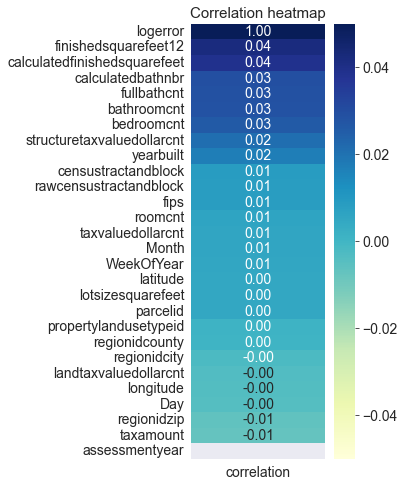

In [253]:
corr = pd.DataFrame(train_df.corr()['logerror'].sort_values(ascending = False)).rename(columns = {'logerror':'correlation'})

plt.figure(figsize = (3,8))
sns.heatmap(corr, annot = True, fmt = '.2f', vmin = -0.05, vmax = 0.05, cmap = 'YlGnBu')
plt.title('Correlation heatmap', fontsize = 15)
plt.show()

### Input and Target Columns

In [42]:
train_df.columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips',
       'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'propertylandusetypeid',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'censustractandblock', 'logerror', 'Month', 'Day',
       'WeekOfYear'],
      dtype='object')

In [71]:
input_cols = ['bathroomcnt', 'bedroomcnt', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips',
       'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'propertylandusetypeid',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'censustractandblock', 'Month', 'Day',
       'WeekOfYear'
]
targets_cols = 'logerror'

In [46]:
inputs = train_df[input_cols].copy()


In [72]:
targets = train_df[targets_cols].copy()

In [47]:
inputs

,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,Month,Day,WeekOfYear
362,2.5,3.0,2.5,1264.0,1264.0,6111.0,2.0,34303597.0,-119287236.0,1735.0,1128,265.0,6.111002e+07,34543.0,2061.0,97081.0,5.0,1986.0,115087.0,191811.0,2015.0,76724.0,2015.06,6.111002e+13,1,27,4
428,1.0,2.0,1.0,777.0,777.0,6111.0,1.0,34272866.0,-119198911.0,NaN,1129,266.0,6.111002e+07,34543.0,2061.0,97083.0,4.0,1990.0,143809.0,239679.0,2015.0,95870.0,2581.30,6.111002e+13,3,30,13
470,2.0,3.0,2.0,1101.0,1101.0,6111.0,2.0,34340801.0,-119079610.0,6569.0,1111,261.0,6.111001e+07,26965.0,2061.0,97113.0,5.0,1956.0,33619.0,47853.0,2015.0,14234.0,591.64,6.111001e+13,5,27,21
480,1.5,2.0,1.5,1554.0,1554.0,6111.0,1.0,34354313.0,-119076405.0,7400.0,1110,261.0,6.111001e+07,26965.0,2061.0,97113.0,5.0,1965.0,45609.0,62914.0,2015.0,17305.0,682.78,6.111001e+13,6,7,23
507,2.5,4.0,2.5,2415.0,2415.0,6111.0,2.0,34266578.0,-119165392.0,6326.0,1111,261.0,6.111001e+07,34543.0,2061.0,97084.0,8.0,1984.0,277000.0,554000.0,2015.0,277000.0,5886.92,6.111001e+13,8,8,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2973529,3.0,4.0,3.0,2068.0,2068.0,6037.0,3.0,34097523.0,-118164828.0,4981.0,0100,261.0,6.037201e+07,12447.0,3101.0,96013.0,0.0,2008.0,388582.0,596082.0,2015.0,207500.0,7335.81,6.037201e+13,4,15,15
2973663,2.0,3.0,2.0,1352.0,1352.0,6037.0,2.0,34045228.0,-117971653.0,6170.0,0100,261.0,6.037407e+07,39306.0,3101.0,96490.0,0.0,1956.0,86209.0,178408.0,2015.0,92199.0,2441.74,6.037407e+13,6,7,23
2973689,2.0,2.0,2.0,860.0,860.0,6037.0,2.0,34100819.0,-118311704.0,NaN,010C,266.0,6.037191e+07,12447.0,3101.0,96009.0,0.0,2011.0,129000.0,420000.0,2015.0,291000.0,5070.41,6.037191e+13,6,30,26
2973726,2.5,3.0,2.5,2268.0,2268.0,6059.0,2.0,33660088.0,-117804958.0,3479.0,1,261.0,6.059063e+07,52650.0,1286.0,96947.0,0.0,2012.0,389474.0,1215816.0,2015.0,826342.0,12508.30,NaN,3,31,13


In [73]:
targets

362        0.0953
428        0.0198
470        0.0060
480       -0.0566
507        0.0573
            ...  
2973529    0.0276
2973663   -0.1188
2973689    0.0843
2973726   -0.0050
2973746    0.0129
Name: logerror, Length: 90150, dtype: float64

### Categorical and Numeric Columns

In [49]:
import numpy as np

In [50]:
numeric_cols = inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = inputs.select_dtypes('object').columns.tolist()

In [51]:
numeric_cols

['bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fips',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertylandusetypeid',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'censustractandblock',
 'Month',
 'Day',
 'WeekOfYear']

In [52]:
categorical_cols

['propertycountylandusecode']

we hava only one categorical column

In [55]:
inputs[categorical_cols].nunique()

propertycountylandusecode    77
dtype: int64

we have about 77 unique values that for a dataset of about 90 thousand rows

### Encode Categorical Columns
Using Onehotencoded

In [56]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))

C:\Users\userpc\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [57]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])

In [58]:
inputs

,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,Month,Day,WeekOfYear,propertycountylandusecode_0,propertycountylandusecode_010,propertycountylandusecode_0100,propertycountylandusecode_0101,propertycountylandusecode_0102,propertycountylandusecode_0103,propertycountylandusecode_0104,propertycountylandusecode_0108,propertycountylandusecode_0109,propertycountylandusecode_010C,propertycountylandusecode_010D,propertycountylandusecode_010E,propertycountylandusecode_010F,propertycountylandusecode_010G,propertycountylandusecode_010H,propertycountylandusecode_010M,propertycountylandusecode_010V,propertycountylandusecode_0110,propertycountylandusecode_0111,propertycountylandusecode_0114,propertycountylandusecode_012C,propertycountylandusecode_012D,propertycountylandusecode_012E,propertycountylandusecode_0130,propertycountylandusecode_0131,propertycountylandusecode_01DC,propertycountylandusecode_01DD,propertycountylandusecode_01HC,propertycountylandusecode_0200,propertycountylandusecode_0201,propertycountylandusecode_020G,propertycountylandusecode_020M,propertycountylandusecode_0210,propertycountylandusecode_0300,propertycountylandusecode_0301,propertycountylandusecode_0303,propertycountylandusecode_030G,propertycountylandusecode_0400,propertycountylandusecode_0401,propertycountylandusecode_040A,propertycountylandusecode_040V,propertycountylandusecode_0700,propertycountylandusecode_070D,propertycountylandusecode_1,propertycountylandusecode_100V,propertycountylandusecode_1011,propertycountylandusecode_1012,propertycountylandusecode_1014,propertycountylandusecode_105,propertycountylandusecode_1110,propertycountylandusecode_1111,propertycountylandusecode_1112,propertycountylandusecode_1116,propertycountylandusecode_1117,propertycountylandusecode_1128,propertycountylandusecode_1129,propertycountylandusecode_1200,propertycountylandusecode_1210,propertycountylandusecode_122,propertycountylandusecode_1222,propertycountylandusecode_1310,propertycountylandusecode_1321,propertycountylandusecode_1333,propertycountylandusecode_135,propertycountylandusecode_1410,propertycountylandusecode_1420,propertycountylandusecode_1421,propertycountylandusecode_1432,propertycountylandusecode_1720,propertycountylandusecode_1722,propertycountylandusecode_200,propertycountylandusecode_34,propertycountylandusecode_38,propertycountylandusecode_6050,propertycountylandusecode_73,propertycountylandusecode_8800,propertycountylandusecode_96,propertycountylandusecode_nan
362,2.5,3.0,2.5,1264.0,1264.0,6111.0,2.0,34303597.0,-119287236.0,1735.0,1128,265.0,6.111002e+07,34543.0,2061.0,97081.0,5.0,1986.0,115087.0,191811.0,2015.0,76724.0,2015.06,6.111002e+13,1,27,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
428,1.0,2.0,1.0,777.0,777.0,6111.0,1.0,34272866.0,-119198911.0,NaN,1129,266.0,6.111002e+07,34543.0,2061.0,97083.0,4.0,1990.0,143809.0,239679.0,2015.0,95870.0,2581.30,6.111002e+13,3,30,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
470,2.0,3.0,2.0,1101.0,1101.0,6111.0,2.0,34340801.0,-119079610.0,6569.0,1111,261.0,6.111001e+07,26965.0,2061.0,97113.0,5.0,1956.0,33619.0,47853.0,2015.0,14234.0,591.64,6.111001e+13,5,27,21,0.0

### Impute missing numerical data

In [59]:
inputs[numeric_cols].isna().sum()

bathroomcnt                         0
bedroomcnt                          0
calculatedbathnbr                1176
calculatedfinishedsquarefeet      658
finishedsquarefeet12             4665
fips                                0
fullbathcnt                      1176
latitude                            0
longitude                           0
lotsizesquarefeet               10136
propertylandusetypeid               0
rawcensustractandblock              0
regionidcity                     1801
regionidcounty                      0
regionidzip                        35
roomcnt                             0
yearbuilt                         753
structuretaxvaluedollarcnt        378
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvaluedollarcnt               1
taxamount                           6
censustractandblock               603
Month                               0
Day                                 0
WeekOfYear                          0
dtype: int64

we still have some missing values which is ok to handle rather than droping the column

In [61]:
from sklearn.impute import SimpleImputer

In [63]:
imputer = SimpleImputer().fit(inputs[numeric_cols])

In [64]:
inputs[numeric_cols] = imputer.transform(inputs[numeric_cols])

### Scale Numeric Values
Let's scale numeric values to the 0 to 1 range.

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])

In [69]:
inputs[numeric_cols].describe()

,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,Month,Day,WeekOfYear
count,90150.000000,90150.000000,90150.000000,90150.000000,90150.000000,90150.000000,90150.000000,90150.000000,90150.000000,90150.000000,90150.000000,90150.000000,90150.000000,90150.000000,90150.000000,90150.000000,90150.000000,90150.000000,90150.000000,90150.0,90150.000000,90150.000000,90150.000000,90150.000000,90150.000000,90150.000000
mean,0.113977,0.189496,0.068904,0.077888,0.087123,0.160443,0.065325,0.451117,0.659806,0.004154,0.946039,0.163455,0.077014,0.682896,0.001989,0.082143,0.642614,0.018094,0.016491,0.0,0.011358,0.018435,0.163067,0.441208,0.511357,0.433470
std,0.050207,0.072257,0.051039,0.040668,0.044280,0.279290,0.050358,0.179438,0.190514,0.016460,0.021243,0.277500,0.117576,0.443889,0.012062,0.156656,0.182029,0.020973,0.019995,0.0,0.016347,0.021244,0.276036,0.255637,0.300286,0.235718
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.100000,0.125000,0.052632,0.052113,0.059367,0.000000,0.052632,0.319872,0.547378,0.000831,0.942623,0.002966,0.022785,0.000000,0.000695,0.000000,0.523077,0.008182,0.007172,0.0,0.003358,0.008774,0.004047,0.272727,0.233333,0.250000
50%,0.100000,0.187500,0.052632,0.067945,0.077907,0.000000,0.052632,0.461994,0.673256,0.001062,0.942623,0.007021,0.055886,1.000000,0.001353,0.000000,0.646154,0.013319,0.012357,0.0,0.007877,0.013962,0.007025,0.454545,0.500000,0.442308
75%,0.150000,0.250000,0.105263,0.091781,0.100495,0.297297,0.105263,0.564416,0.806299,0.003151,0.963115,0.296872,0.106766,1.000000,0.003309,0.000000,0.784615,0.021106,0.019480,0.0,0.014096,0.021284,0.296872,0.636364,0.766667,0.615385
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The data is now set for training

In [74]:
train_inputs = inputs[numeric_cols + encoded_cols]
train_inputs

,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,Month,Day,WeekOfYear,propertycountylandusecode_0,propertycountylandusecode_010,propertycountylandusecode_0100,propertycountylandusecode_0101,propertycountylandusecode_0102,propertycountylandusecode_0103,propertycountylandusecode_0104,propertycountylandusecode_0108,propertycountylandusecode_0109,propertycountylandusecode_010C,propertycountylandusecode_010D,propertycountylandusecode_010E,propertycountylandusecode_010F,propertycountylandusecode_010G,propertycountylandusecode_010H,propertycountylandusecode_010M,propertycountylandusecode_010V,propertycountylandusecode_0110,propertycountylandusecode_0111,propertycountylandusecode_0114,propertycountylandusecode_012C,propertycountylandusecode_012D,propertycountylandusecode_012E,propertycountylandusecode_0130,propertycountylandusecode_0131,propertycountylandusecode_01DC,propertycountylandusecode_01DD,propertycountylandusecode_01HC,propertycountylandusecode_0200,propertycountylandusecode_0201,propertycountylandusecode_020G,propertycountylandusecode_020M,propertycountylandusecode_0210,propertycountylandusecode_0300,propertycountylandusecode_0301,propertycountylandusecode_0303,propertycountylandusecode_030G,propertycountylandusecode_0400,propertycountylandusecode_0401,propertycountylandusecode_040A,propertycountylandusecode_040V,propertycountylandusecode_0700,propertycountylandusecode_070D,propertycountylandusecode_1,propertycountylandusecode_100V,propertycountylandusecode_1011,propertycountylandusecode_1012,propertycountylandusecode_1014,propertycountylandusecode_105,propertycountylandusecode_1110,propertycountylandusecode_1111,propertycountylandusecode_1112,propertycountylandusecode_1116,propertycountylandusecode_1117,propertycountylandusecode_1128,propertycountylandusecode_1129,propertycountylandusecode_1200,propertycountylandusecode_1210,propertycountylandusecode_122,propertycountylandusecode_1222,propertycountylandusecode_1310,propertycountylandusecode_1321,propertycountylandusecode_1333,propertycountylandusecode_135,propertycountylandusecode_1410,propertycountylandusecode_1420,propertycountylandusecode_1421,propertycountylandusecode_1432,propertycountylandusecode_1720,propertycountylandusecode_1722,propertycountylandusecode_200,propertycountylandusecode_34,propertycountylandusecode_38,propertycountylandusecode_6050,propertycountylandusecode_73,propertycountylandusecode_8800,propertycountylandusecode_96,propertycountylandusecode_nan
362,0.125,0.1875,0.078947,0.055499,0.063065,1.000000,0.052632,0.653005,0.084857,0.000225,0.959016,0.999907,0.079000,0.426997,0.003619,0.277778,0.776923,0.011559,0.006911,0.0,0.003131,0.006108,0.999907,0.000000,0.866667,0.057692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
428,0.050,0.1250,0.000000,0.034082,0.038729,1.000000,0.000000,0.632195,0.131517,0.004154,0.963115,0.999897,0.079000,0.426997,0.003625,0.222222,0.807692,0.014446,0.008636,0.0,0.003912,0.007867,0.999897,0.181818,0.966667,0.230769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
470,0.100,0.1875,0.052632,0.048331,0.054920,1.000000,0.052632,0.678199,0.194541,0.000918,0.942623,0.999886,0.059720,0.426997,0.003724,0.2777

### Spliting of the data sets into train and validation set

In [70]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_val, train_targets, val_targets = train_test_split(train_inputs, targets, test_size=0.2, random_state=42)

In [81]:
X_train

,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,Month,Day,WeekOfYear,propertycountylandusecode_0,propertycountylandusecode_010,propertycountylandusecode_0100,propertycountylandusecode_0101,propertycountylandusecode_0102,propertycountylandusecode_0103,propertycountylandusecode_0104,propertycountylandusecode_0108,propertycountylandusecode_0109,propertycountylandusecode_010C,propertycountylandusecode_010D,propertycountylandusecode_010E,propertycountylandusecode_010F,propertycountylandusecode_010G,propertycountylandusecode_010H,propertycountylandusecode_010M,propertycountylandusecode_010V,propertycountylandusecode_0110,propertycountylandusecode_0111,propertycountylandusecode_0114,propertycountylandusecode_012C,propertycountylandusecode_012D,propertycountylandusecode_012E,propertycountylandusecode_0130,propertycountylandusecode_0131,propertycountylandusecode_01DC,propertycountylandusecode_01DD,propertycountylandusecode_01HC,propertycountylandusecode_0200,propertycountylandusecode_0201,propertycountylandusecode_020G,propertycountylandusecode_020M,propertycountylandusecode_0210,propertycountylandusecode_0300,propertycountylandusecode_0301,propertycountylandusecode_0303,propertycountylandusecode_030G,propertycountylandusecode_0400,propertycountylandusecode_0401,propertycountylandusecode_040A,propertycountylandusecode_040V,propertycountylandusecode_0700,propertycountylandusecode_070D,propertycountylandusecode_1,propertycountylandusecode_100V,propertycountylandusecode_1011,propertycountylandusecode_1012,propertycountylandusecode_1014,propertycountylandusecode_105,propertycountylandusecode_1110,propertycountylandusecode_1111,propertycountylandusecode_1112,propertycountylandusecode_1116,propertycountylandusecode_1117,propertycountylandusecode_1128,propertycountylandusecode_1129,propertycountylandusecode_1200,propertycountylandusecode_1210,propertycountylandusecode_122,propertycountylandusecode_1222,propertycountylandusecode_1310,propertycountylandusecode_1321,propertycountylandusecode_1333,propertycountylandusecode_135,propertycountylandusecode_1410,propertycountylandusecode_1420,propertycountylandusecode_1421,propertycountylandusecode_1432,propertycountylandusecode_1720,propertycountylandusecode_1722,propertycountylandusecode_200,propertycountylandusecode_34,propertycountylandusecode_38,propertycountylandusecode_6050,propertycountylandusecode_73,propertycountylandusecode_8800,propertycountylandusecode_96,propertycountylandusecode_nan
2764984,0.150,0.1250,0.105263,0.045648,0.051871,0.0,0.105263,0.557186,0.567300,0.004154,0.963115,0.000329,0.022785,1.000000,0.001528,0.000000,0.769231,0.023351,0.011963,0.0,0.004064,0.014273,0.000329,0.727273,0.600000,0.711538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
700730,0.150,0.2500,0.105263,0.066054,0.075059,0.0,0.105263,0.570354,0.492191,0.000823,0.942623,0.000430,0.022785,1.000000,0.001208,0.000000,0.500000,0.016174,0.019531,0.0,0.015550,0.020102,0.000430,0.000000,0.666667,0.038462,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125824,0.050,0.1875,0.000000,0.049782,0.056569,0.0,0.000000,0.387281,0.667614,0.001349,0.942623,0.005963,0.074097,1.000000,0.000431,0.000000,0.

In [82]:
train_targets

2764984    0.0178
700730     0.0090
125824    -0.0010
2577808    0.0325
810949     0.0695
            ...  
209064     0.0237
1814110    0.0100
2537349    0.0237
28961      0.0080
521529     0.0000
Name: logerror, Length: 72120, dtype: float64

In [83]:
X_val

,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,Month,Day,WeekOfYear,propertycountylandusecode_0,propertycountylandusecode_010,propertycountylandusecode_0100,propertycountylandusecode_0101,propertycountylandusecode_0102,propertycountylandusecode_0103,propertycountylandusecode_0104,propertycountylandusecode_0108,propertycountylandusecode_0109,propertycountylandusecode_010C,propertycountylandusecode_010D,propertycountylandusecode_010E,propertycountylandusecode_010F,propertycountylandusecode_010G,propertycountylandusecode_010H,propertycountylandusecode_010M,propertycountylandusecode_010V,propertycountylandusecode_0110,propertycountylandusecode_0111,propertycountylandusecode_0114,propertycountylandusecode_012C,propertycountylandusecode_012D,propertycountylandusecode_012E,propertycountylandusecode_0130,propertycountylandusecode_0131,propertycountylandusecode_01DC,propertycountylandusecode_01DD,propertycountylandusecode_01HC,propertycountylandusecode_0200,propertycountylandusecode_0201,propertycountylandusecode_020G,propertycountylandusecode_020M,propertycountylandusecode_0210,propertycountylandusecode_0300,propertycountylandusecode_0301,propertycountylandusecode_0303,propertycountylandusecode_030G,propertycountylandusecode_0400,propertycountylandusecode_0401,propertycountylandusecode_040A,propertycountylandusecode_040V,propertycountylandusecode_0700,propertycountylandusecode_070D,propertycountylandusecode_1,propertycountylandusecode_100V,propertycountylandusecode_1011,propertycountylandusecode_1012,propertycountylandusecode_1014,propertycountylandusecode_105,propertycountylandusecode_1110,propertycountylandusecode_1111,propertycountylandusecode_1112,propertycountylandusecode_1116,propertycountylandusecode_1117,propertycountylandusecode_1128,propertycountylandusecode_1129,propertycountylandusecode_1200,propertycountylandusecode_1210,propertycountylandusecode_122,propertycountylandusecode_1222,propertycountylandusecode_1310,propertycountylandusecode_1321,propertycountylandusecode_1333,propertycountylandusecode_135,propertycountylandusecode_1410,propertycountylandusecode_1420,propertycountylandusecode_1421,propertycountylandusecode_1432,propertycountylandusecode_1720,propertycountylandusecode_1722,propertycountylandusecode_200,propertycountylandusecode_34,propertycountylandusecode_38,propertycountylandusecode_6050,propertycountylandusecode_73,propertycountylandusecode_8800,propertycountylandusecode_96,propertycountylandusecode_nan
924822,0.10,0.1250,0.052632,0.050354,0.057219,0.000000,0.052632,0.719558,0.510176,0.013380,0.963115,0.011080,0.129292,1.000000,0.001218,0.000000,0.761538,0.018034,0.010810,0.0,0.004917,0.013408,0.011080,0.272727,0.700000,0.288462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2501834,0.10,0.1875,0.052632,0.060777,0.069062,0.000000,0.052632,0.387414,0.569106,0.000758,0.942623,0.006781,0.098353,1.000000,0.000412,0.000000,0.538462,0.016174,0.019387,0.0,0.015387,0.021292,0.006781,0.181818,0.700000,0.211538,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1620374,0.25,0.2500,0.210526,0.187079,0.212583,0.000000,0.210526,0.540866,0.406517,0.001791,0.975410,0.009459,0.087001,1.000000,0.00116

In [84]:
val_targets

924822    -0.0131
2501834   -0.0387
1620374    0.0198
1055203   -0.0736
1112159   -0.0429
            ...  
2878296    0.1856
289918    -0.0429
2051685    0.0247
97048      0.0402
2021320    0.0325
Name: logerror, Length: 18030, dtype: float64

### Random Forest

In [118]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [86]:
ran_model = RandomForestRegressor(random_state=42, n_jobs=-1)

In [87]:
ran_model.fit(X_train, train_targets)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [88]:
ran_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': ran_model.feature_importances_
}).sort_values('importance', ascending=False)

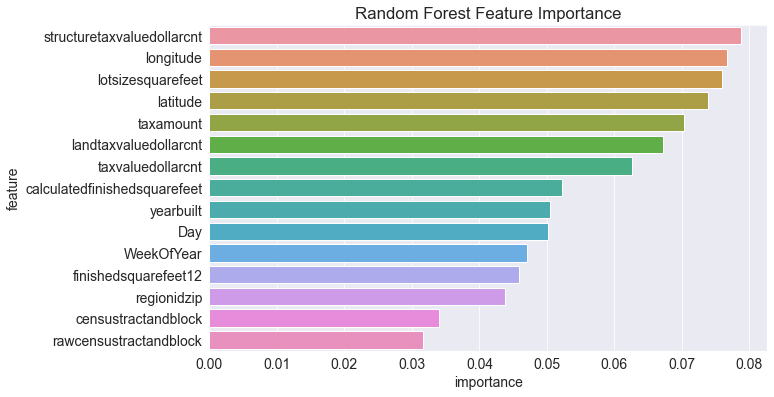

In [93]:
plt.title('Random Forest Feature Importance')
sns.barplot(data=ran_importance_df.head(15), x='importance', y='feature');

We can see that there are so many factors that contributes to the logerror

In [119]:
train_pred = ran_model.predict(X_train)

In [123]:
mean_squared_error(train_targets, train_pred, squared=False)

0.05988095135610655

In [124]:
val_pred = ran_model.predict(X_val)

In [125]:
mean_squared_error(val_targets, val_pred, squared=False)

0.16875743445258112

### Hyperparameter Tuning
I will be using few parameters such as:

- max_depth
- n_estimators
- max_features

In [126]:
def params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    train_preds, val_preds = model.predict(X_train), model.predict(X_val)
    train_mean_error= mean_squared_error(train_targets, train_preds, squared=False)
    val_mean_error = mean_squared_error(val_targets, val_preds, squared=False)
    return f"train_mean_error is {train_mean_error} and val_mean_error is {val_mean_error}"

In [127]:
params()

'train_mean_error is 0.05988095135610654 and val_mean_error is 0.16875743445258112'

In [145]:
params(max_depth=3)

'train_mean_error is 0.1584312589059041 and val_mean_error is 0.1659928314878282'

In [136]:
params(n_estimators=50)

'train_mean_error is 0.061345712062598014 and val_mean_error is 0.16922972909908487'

In [185]:
params(min_samples_split=4)

'train_mean_error is 0.07168530859259972 and val_mean_error is 0.16825711741500715'

In [132]:
params(max_features=0.4)

'train_mean_error is 0.059479923252444 and val_mean_error is 0.1671017142256836'

In [144]:
params(max_features=0.5)

'train_mean_error is 0.059747997969794846 and val_mean_error is 0.16826530496245934'

In [142]:
params(max_depth=5)

'train_mean_error is 0.1572989461385935 and val_mean_error is 0.16567600134856753'

##### Training the final parameters on the model

In [187]:
params(max_depth=3, max_features=0.4, n_estimators=70, min_samples_split=5)

'train_mean_error is 0.1584014842254867 and val_mean_error is 0.16595614522317081'

### XGBRegressor

In [152]:
from xgboost import XGBRegressor

In [153]:
xgb_model = XGBRegressor(random_state=42, n_jobs=-1).fit(X_train, train_targets)

In [154]:
xgb_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

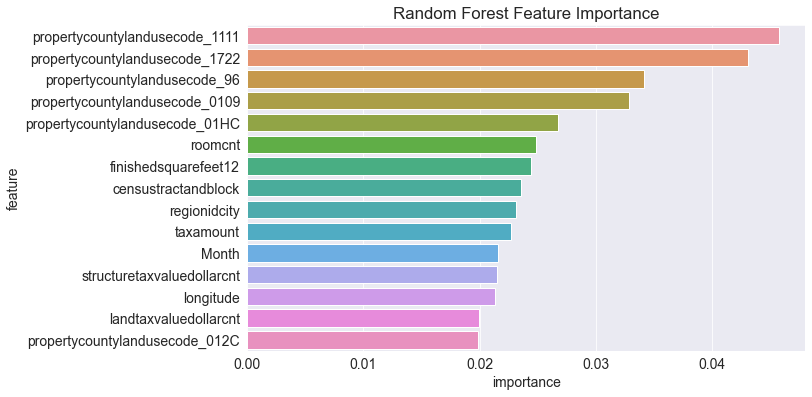

In [155]:
plt.title('XGBRegressor Feature Importance')
sns.barplot(data=xgb_importance_df.head(15), x='importance', y='feature');

In [156]:
def xgboost(**params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    train_preds, val_preds = model.predict(X_train), model.predict(X_val)
    train_mean_error= mean_squared_error(train_targets, train_preds, squared=False)
    val_mean_error = mean_squared_error(val_targets, val_preds, squared=False)
    return f"train_mean_error is {train_mean_error} and val_mean_error is {val_mean_error}"

In [157]:
xgboost()

'train_mean_error is 0.12892200903962844 and val_mean_error is 0.17274152371362572'

In [160]:
xgboost(n_estimators=20)

'train_mean_error is 0.14984082196380266 and val_mean_error is 0.16826878201818882'

In [161]:
xgboost(learning_rate=0.1)

'train_mean_error is 0.14696943806189477 and val_mean_error is 0.1676589071395085'

In [165]:
xgboost(learnig_rate=0.3)

[21:33:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learnig_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




'train_mean_error is 0.12892200903962844 and val_mean_error is 0.17274152371362572'

In [162]:
xgboost(n_estimators=50)

'train_mean_error is 0.13984906938376665 and val_mean_error is 0.17123431989179888'

In [163]:
xgboost(max_depth=18)

'train_mean_error is 0.019760276802740517 and val_mean_error is 0.1789907523289669'

#### Final Xgboost parameter model training

In [166]:
xgboost(n_estimators=20, learning_rate=0.1)

'train_mean_error is 0.1665745808430614 and val_mean_error is 0.1765186880073904'

### Gradient Boosting

In [167]:
from sklearn.ensemble import GradientBoostingRegressor

In [168]:
grad_model = GradientBoostingRegressor(random_state=42).fit(X_train, train_targets)

In [169]:
grad_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': grad_model.feature_importances_
}).sort_values('importance', ascending=False)

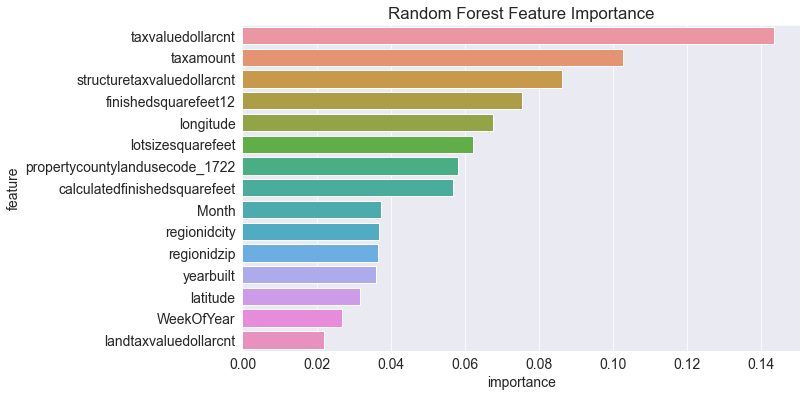

In [170]:
plt.title('Gradient Boosting Feature Importance')
sns.barplot(data=grad_importance_df.head(15), x='importance', y='feature');

In [171]:
def gboost(**params):
    model = GradientBoostingRegressor(random_state=42, **params).fit(X_train, train_targets)
    train_preds, val_preds = model.predict(X_train), model.predict(X_val)
    train_mean_error= mean_squared_error(train_targets, train_preds, squared=False)
    val_mean_error = mean_squared_error(val_targets, val_preds, squared=False)
    return f"train_mean_error is {train_mean_error} and val_mean_error is {val_mean_error}"

In [172]:
gboost()

'train_mean_error is 0.1541856878813245 and val_mean_error is 0.1669706479975193'

In [176]:
gboost(learning_rate=0.1)

'train_mean_error is 0.1541856878813245 and val_mean_error is 0.1669706479975193'

In [184]:
gboost(n_estimators=15)

'train_mean_error is 0.1579007665860345 and val_mean_error is 0.1658427376399981'

In [183]:
gboost(min_samples_split=4)

'train_mean_error is 0.1541030607179477 and val_mean_error is 0.16623274726367535'

In [179]:
gboost(n_estimators=20)

'train_mean_error is 0.15754613591544825 and val_mean_error is 0.16578147068996701'

In [231]:
gboost(learning_rate=0.1, n_estimators=50, min_samples_split=4)

'train_mean_error is 0.15616865589868306 and val_mean_error is 0.1658377879194888'

### Train the final model
The final model will be trained

In [227]:
model = GradientBoostingRegressor(random_state=42, learning_rate=0.1, n_estimators=50, min_samples_split=4).fit(train_inputs, targets)

In [228]:
train_predicts = model.predict(train_inputs)

In [229]:
mean_squared_error(targets, train_predicts, squared=False)

0.15790292543594614

### Saving the model

In [204]:
import joblib

In [205]:
zillow_prize_rf = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': targets_cols,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [206]:
joblib.dump(zillow_prize_rf, 'zillow_prize_rf.joblib')

['zillow_prize_rf.joblib']

### Testing dataset

In [233]:
def test_cleaner(prop_raw, test_df):
    ## handling duplicate values
    unique_test_df = test_df.sort_values("transactiondate").drop_duplicates("parcelid",keep = "last")
    merged_df = pd.merge(prop_raw, unique_test_df, on='parcelid', how='left')
    ## date colums
    split_date_df(merged_df)
    ##inputs col
    inputs = merged_df[input_cols].copy()
    ## encoded col
    inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
    ## missing values
    inputs[numeric_cols] = imputer.transform(inputs[numeric_cols])
    ## scaling numeric col
    inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
    ## training inputs
    test_inputs = inputs[numeric_cols + encoded_cols]
    return test_inputs

In [225]:
os.listdir('zillow-prize-1')

['properties_2016.csv',
 'properties_2017.csv',
 'sample_submission.csv',
 'train_2016_v2.csv',
 'train_2017.csv',
 'zillow_data_dictionary.xlsx']

In [232]:
test_raw = pd.read_csv('.\zillow-prize-1/train_2017.csv')
test_prop = pd.read_csv('.\zillow-prize-1/properties_2017.csv')
sample_sub = pd.read_csv('.\zillow-prize-1/sample_submission.csv')

C:\Users\userpc\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [235]:
sample_sub

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
3,10859147,0,0,0,0,0,0
4,10879947,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2985212,168176230,0,0,0,0,0,0
2985213,14273630,0,0,0,0,0,0
2985214,168040630,0,0,0,0,0,0
2985215,168040830,0,0,0,0,0,0


In [236]:
test_raw

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01
...,...,...,...
77608,10833991,-0.002245,2017-09-20
77609,11000655,0.020615,2017-09-20
77610,17239384,0.013209,2017-09-21
77611,12773139,0.037129,2017-09-21


## Conclusion
The model was trained using Gradient boosting regressor
##### - Summary
The data set was gotten from kaggle 
- There were duplicate of parselid rows which was removed
- Some houses were sold and were later resold but the last was put into consederation
- With 
 

##### Limitations
- I have a slow system that made me not to use xgboost for train and testing which would have drastically improve the model
- Slow cpu
- all downsides and errors that may be found is associated to my slow pc that was why it was igored


In [237]:
import jovian

<IPython.core.display.Javascript object>

In [254]:
jovian.commit(outputs='zillow_prize_rf.joblib')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "fidekg123/zillow-prize-prediction" on https://jovian.ai/
[jovian] Uploading additional outputs...
[jovian] Committed successfully! https://jovian.ai/fidekg123/zillow-prize-prediction


'https://jovian.ai/fidekg123/zillow-prize-prediction'

Inspirational Materials
https://jovian.ai/fidekg123/python-gradient-boosting-machines
https://jovian.ai/fidekg123/rossmann-stores-customers
https://www.kaggle.com/yurimhwang/zillow-prize-zillow-s-home-value-prediction-yr?rvi=1
https://www.kaggle.com/alikashif1994/zillow-scr?rvi=1
https://jovian.ai/fidekg123/python-random-forests-assignment
https://www.kaggle.com/noey26/modeling-project?rvi=1
https://www.kaggle.com/hyewon328/zillow-analysis-with-eda?rvi=1
https://www.kaggle.com/c/zillow-prize-1?rvi=1

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>